# Práctica APA

Marc Nebot Moyano |||
Alejandro Salvat Navarro

Para nuestra práctica hemos decidido abordar el problema de predecir el número de proteínas de un alimento según sus nutrientes. Para ello, hemos seleccionado un dataset de Kaggle, sin solución previa, que incluye una lista de alimentos, con sus respectivos nutrientes y cantidad de calorias.

Antes de iniciar la visualización de datos, nos hemos encargados de hacer un pequeño preproceso, en el cual hemos borrado aquellos alimentos o nutrientes que nos daban problemas, ya sea por presencia de valores nulos o con un formato incorrecto.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split,  KFold, cross_val_score
from sklearn.svm import LinearSVR, SVR
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error
!pip install scikit_optimize
!apt install skopt
from skopt import BayesSearchCV
from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 10.8 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package skopt


In [3]:
df = pd.read_csv('cleaned_ingredients.csv')
df.head(6)
df

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
0,1001,butter with salt,717.000,0.85,51.36800,81.11,0.06,0.0,0.06,24.00,...,0.0,0.005,0.034,0.042,0.003,3.0,0.17,684.0,2.32,0.0
1,1002,butter whipped w salt,718.000,0.49,45.39000,78.30,2.87,0.0,0.06,23.00,...,0.0,0.007,0.064,0.022,0.008,4.0,0.07,683.0,1.37,0.0
2,1003,butter oil anhydrous,876.000,0.28,61.92400,99.48,0.00,0.0,0.00,4.00,...,0.0,0.001,0.005,0.003,0.001,0.0,0.01,840.0,2.8,0.0
3,1004,cheese blue,353.000,21.40,18.66900,28.74,2.34,0.0,0.50,528.00,...,0.0,0.029,0.382,1.016,0.166,36.0,1.22,198.0,0.25,0.5
4,1005,cheese brick,371.000,23.24,18.76400,29.68,2.79,0.0,0.51,674.00,...,0.0,0.014,0.351,0.118,0.065,20.0,1.26,292.0,0.26,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,S006,rohu,102.292,19.71,2.04700,2.39,0.00,0.0,0.00,39.37,...,0.0,0.000,0.040,2.330,240.000,1263.0,0.00,0.0,2.4,0.0
9314,S007,crab,78.153,13.23,0.21400,0.89,0.00,0.0,0.00,199.00,...,0.0,0.010,0.110,1.540,202.000,1783.0,0.00,0.0,4.85,0.0
9315,S008,prawns big,90.820,19.24,0.08686,0.52,0.00,0.0,0.00,48.55,...,0.0,0.000,0.020,1.310,186.000,1826.0,0.00,0.0,0,0.0
9316,S009,prawns small,70.983,13.07,0.19700,0.78,0.00,0.0,0.00,67.99,...,0.0,0.010,0.030,0.540,207.000,1306.0,0.00,0.0,1.75,0.0


In [4]:
df.columns

Index(['NDB_No', 'Descrip', 'Energy_kcal', 'Protein_g', 'Saturated_fats_g',
       'Fat_g', 'Carb_g', 'Fiber_g', 'Sugar_g', 'Calcium_mg', 'Iron_mg',
       'Magnesium_mg', 'Phosphorus_mg', 'Potassium_mg', 'Sodium_mg', 'Zinc_mg',
       'Copper_mcg', 'Manganese_mg', 'Selenium_mcg', 'VitC_mg', 'Thiamin_mg',
       'Riboflavin_mg', 'Niacin_mg', 'VitB6_mg', 'Folate_mcg', 'VitB12_mcg',
       'VitA_mcg', 'VitE_mg', 'VitD2_mcg'],
      dtype='object')

In [5]:
df.describe()

,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,Iron_mg,Phosphorus_mg,...,Selenium_mcg,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitD2_mcg
count,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,...,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000
mean,220.897683,11.321644,3.305349,10.202202,21.504095,2.149810,6.522893,73.626774,2.664721,154.555758,...,12.911910,8.635112,0.201506,0.226599,3.300760,1.900472,36.649891,1.135288,89.133407,0.343880
std,169.034417,10.438045,6.298633,15.575583,26.998286,4.453051,13.496676,198.130979,5.631967,198.991857,...,27.845701,64.147308,0.494901,0.427369,4.647165,15.738592,162.025154,4.158457,750.651532,3.003964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,86.000000,2.332500,0.136000,0.820000,0.000000,0.000000,0.000000,9.000000,0.490000,36.000000,...,0.100000,0.000000,0.030000,0.042250,0.383000,0.037000,0.000000,0.000000,0.000000,0.000000
50%,183.000000,8.100000,1.319000,4.800000,8.720000,0.400000,0.460000,19.935000,1.300000,131.000000,...,4.300000,0.000000,0.075000,0.145000,2.000000,0.125000,7.000000,0.010000,1.000000,0.000000
75%,330.582000,19.870000,4.000000,13.210000,32.445000,2.500000,5.487500,64.000000,2.597500,216.000000,...,21.500000,2.780000,0.216750,0.253000,4.938750,0.366000,19.000000,1.110000,19.000000,0.000000
max,902.000000,88.320000,95.600000,100.000000,100.000000,79.000000,99.800000,7364.000000,123.600000,9918.000000,...,1917.000000,2732.000000,23.375000,17.500000,127.500000,316.000000,2875.000000,98.890000,30000.000000,250.000000


In [6]:
df.isnull().sum()

NDB_No              0
Descrip             0
Energy_kcal         0
Protein_g           0
Saturated_fats_g    0
Fat_g               0
Carb_g              0
Fiber_g             0
Sugar_g             0
Calcium_mg          0
Iron_mg             0
Magnesium_mg        0
Phosphorus_mg       0
Potassium_mg        0
Sodium_mg           0
Zinc_mg             0
Copper_mcg          0
Manganese_mg        0
Selenium_mcg        0
VitC_mg             0
Thiamin_mg          0
Riboflavin_mg       0
Niacin_mg           0
VitB6_mg            0
Folate_mcg          0
VitB12_mcg          0
VitA_mcg            0
VitE_mg             0
VitD2_mcg           0
dtype: int64

In [7]:
(df == 0).sum()

NDB_No                 0
Descrip                0
Energy_kcal           39
Protein_g            358
Saturated_fats_g     782
Fat_g                374
Carb_g              2372
Fiber_g             4275
Sugar_g             4180
Calcium_mg           632
Iron_mg              428
Magnesium_mg           0
Phosphorus_mg        813
Potassium_mg         573
Sodium_mg            280
Zinc_mg              910
Copper_mcg          1489
Manganese_mg        2315
Selenium_mcg        2178
VitC_mg             5209
Thiamin_mg           998
Riboflavin_mg        953
Niacin_mg            927
VitB6_mg            1280
Folate_mcg          2568
VitB12_mcg          4657
VitA_mcg            4355
VitE_mg                0
VitD2_mcg           6998
dtype: int64

In [8]:
(df == '0.49 1.22').sum()

NDB_No              0
Descrip             0
Energy_kcal         0
Protein_g           0
Saturated_fats_g    0
Fat_g               0
Carb_g              0
Fiber_g             0
Sugar_g             0
Calcium_mg          0
Iron_mg             0
Magnesium_mg        0
Phosphorus_mg       0
Potassium_mg        0
Sodium_mg           0
Zinc_mg             0
Copper_mcg          0
Manganese_mg        0
Selenium_mcg        0
VitC_mg             0
Thiamin_mg          0
Riboflavin_mg       0
Niacin_mg           0
VitB6_mg            0
Folate_mcg          0
VitB12_mcg          0
VitA_mcg            0
VitE_mg             1
VitD2_mcg           0
dtype: int64

In [9]:
df['VitE_mg'].value_counts()

0        3385
0.12      137
0.01      130
0.07      123
0.02      117
         ... 
13.54       1
15.03       1
17.5        1
15.28       1
4.85        1
Name: VitE_mg, Length: 585, dtype: int64

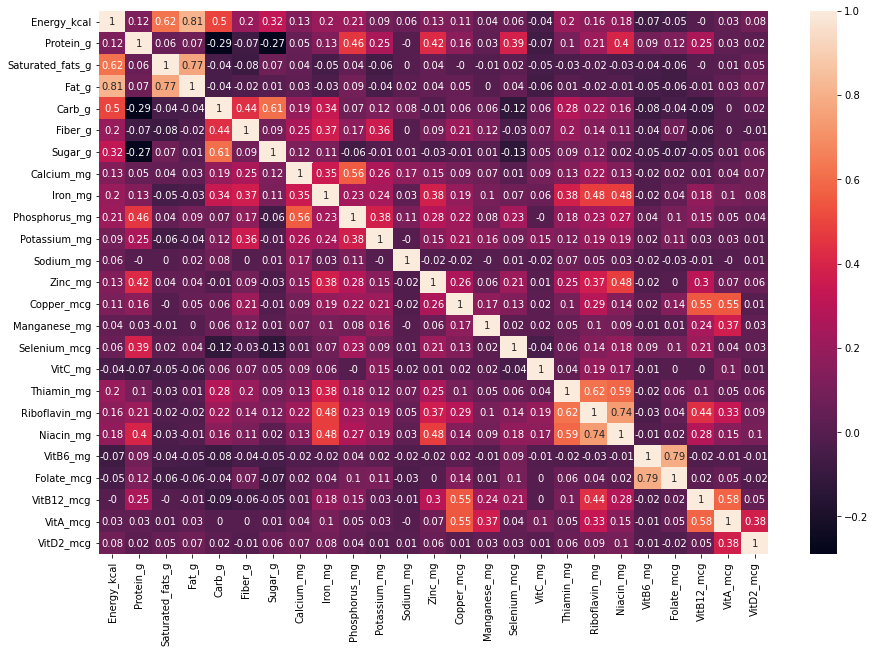

In [10]:
correlation_matrix = df.corr().round(2) # arrodonir a 2 decimals
plt.figure(figsize = (15,10))
sns.heatmap(data = correlation_matrix, annot = True);

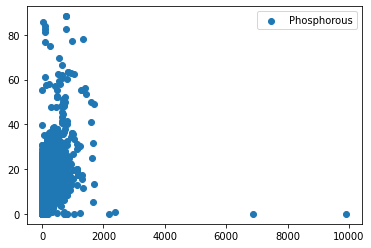

In [11]:
plt.scatter(df["Phosphorus_mg"],df["Protein_g"],label="Phosphorous" )
plt.legend()
plt.show()

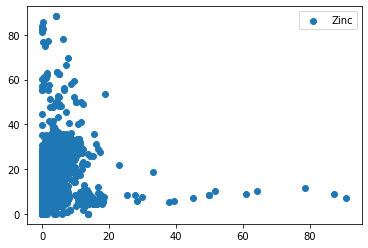

In [12]:
plt.scatter(df["Zinc_mg"],df["Protein_g"] , label="Zinc")
plt.legend()
plt.show()

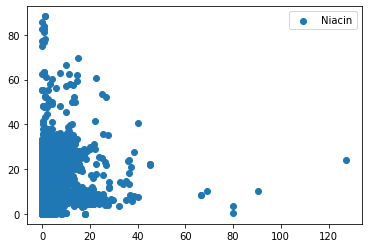

In [13]:
plt.scatter(df["Niacin_mg"],df["Protein_g"] , label="Niacin")
plt.legend()
plt.show()

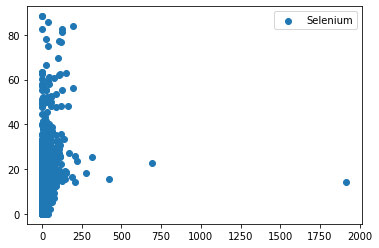

In [14]:
plt.scatter(df["Selenium_mcg"],df["Protein_g"],label="Selenium" )
plt.legend()
plt.show()

In [15]:
df[df["Phosphorus_mg"] > 2000]

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
5854,18369,leavening agents baking pdr double-acting na a...,53.0,0.00,0.000,0.0,27.70,0.2,0.0,5876.0,...,0.0,0.000,0.000,0.000,0.000,0.0,0.00,0.0,0,0.0
5855,18370,leavening agents baking pdr double-acting stra...,51.0,0.10,0.000,0.0,24.10,0.2,0.0,7364.0,...,0.0,0.000,0.000,0.000,0.000,0.0,0.00,0.0,0,0.0
5856,18371,leavening agents baking pdr low-sodium,97.0,0.10,0.073,0.4,46.90,2.2,0.0,4332.0,...,0.0,0.000,0.000,0.000,0.000,0.0,0.00,0.0,0,0.0
8782,44260,puddings all flavors xcpt choc lo cal inst dry...,350.0,0.81,0.099,0.9,84.66,0.8,0.9,143.0,...,0.0,0.005,0.021,0.014,0.005,1.0,0.05,0.0,0.08,0.0


In [16]:
df[df["Zinc_mg"] > 20]

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
1790,8028,cereals rte kellogg kellogg's all-bran complet...,327.0,10.20,0.400,2.50,81.60,17.3,18.80,39.0,...,207.0,5.170,5.860,69.000,6.900,19.0,21.00,776.0,46.35,3.5
1808,8058,cereals rte kellogg kellogg's product 19,374.0,8.50,0.200,1.30,84.30,2.8,12.50,16.0,...,200.0,5.000,5.670,66.700,6.670,19.0,20.00,748.0,45,3.3
1821,8077,cereals rte general mills whl grain total,320.0,8.40,0.600,2.10,74.70,9.1,16.40,3333.0,...,200.0,5.000,5.700,66.700,6.667,19.0,20.00,498.0,45,8.3
1829,8089,cereals rte general mills wheaties,353.0,8.30,0.500,2.30,83.30,10.1,15.20,74.0,...,22.2,2.800,3.100,37.000,3.704,19.0,11.10,554.0,0.64,3.7
1904,8247,cereals rte general mills total raisin bran,312.0,5.60,0.400,1.60,76.80,9.1,32.30,1887.0,...,0.0,2.800,3.200,37.700,3.774,19.0,11.30,281.0,25.47,4.7
1927,8318,cereals rte kellogg kellogg's smart start anti...,371.0,7.50,0.300,1.50,86.80,5.4,27.79,29.0,...,30.0,3.000,3.400,40.000,4.000,19.0,12.00,688.0,27,2.0
1983,8504,cereals rte ralston enr wheat bran flakes,310.0,10.21,0.433,3.36,79.77,16.9,17.17,45.0,...,239.7,4.713,7.290,90.567,6.800,0.0,20.69,531.0,80.46,8.6
2019,8580,incaparina dry mix (corn soy flours) unprep,379.0,21.75,0.000,5.58,60.53,9.9,0.00,600.0,...,0.0,1.930,0.610,27.000,0.690,0.0,1.50,1770.0,0.36,0.0
4644,15167,oyster eastern wild raw,51.0,5.71,0.474,1.71,2.72,0.0,0.62,59.0,...,0.0,0.018,0.090,0.925,0.031,7.0,8.75,13.0,0.85,0.0
4645,15168,oyster eastern ckd breadedfried,199.0,8.77,3.197,12.58,11.62,0.0,0.00,62.0,...,3.8,0.150,0.202,1.650,0.064,14.0,15.63,90.0,0,0.0


In [17]:
df[df["Niacin_mg"] > 60]

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
1790,8028,cereals rte kellogg kellogg's all-bran complet...,327.0,10.20,0.400,2.50,81.60,17.3,18.80,39.0,...,207.0,5.170,5.86,69.000,6.900,19.0,21.00,776.0,46.35,3.5
1808,8058,cereals rte kellogg kellogg's product 19,374.0,8.50,0.200,1.30,84.30,2.8,12.50,16.0,...,200.0,5.000,5.67,66.700,6.670,19.0,20.00,748.0,45,3.3
1821,8077,cereals rte general mills whl grain total,320.0,8.40,0.600,2.10,74.70,9.1,16.40,3333.0,...,200.0,5.000,5.70,66.700,6.667,19.0,20.00,498.0,45,8.3
1983,8504,cereals rte ralston enr wheat bran flakes,310.0,10.21,0.433,3.36,79.77,16.9,17.17,45.0,...,239.7,4.713,7.29,90.567,6.800,0.0,20.69,531.0,80.46,8.6
4382,14409,beverages orange-flavor drk brkfst type lo cal...,217.0,3.60,0.000,0.00,85.90,3.8,2.60,1378.0,...,2400.0,0.000,6.80,80.000,8.000,0.0,0.00,6006.0,0,0.0
8710,43345,bever fruit-flav drk pdr w hi vit c w other ad...,227.0,0.25,0.010,0.16,91.00,2.2,0.00,800.0,...,2400.0,0.009,6.80,80.000,8.000,5.0,0.00,5997.0,0.02,0.0
8734,43406,yeast extract spread,185.0,23.88,0.000,0.90,20.42,6.5,1.60,67.0,...,0.0,23.375,17.50,127.500,0.000,793.0,0.50,0.0,0,0.0


In [18]:
df[df["Selenium_mcg"] > 500]

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
3640,12078,brazilnuts dried unblanched,659.0,14.32,16.134,67.1,11.74,7.5,2.33,160.0,...,0.7,0.617,0.035,0.295,0.101,22.0,0.0,0.0,5.65,0.0
8437,35226,sea lion steller liver (alaska native),137.0,22.90,1.300,5.0,0.00,0.0,0.00,6.0,...,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0,0.0


In [19]:
df = df.drop(df.index[df['Magnesium_mg'] == 'X'])

In [20]:
df.drop(columns=['NDB_No', 'Descrip','VitE_mg'], inplace=True)

In [21]:
df

,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,Iron_mg,Magnesium_mg,...,Selenium_mcg,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitD2_mcg
0,717.000,0.85,51.36800,81.11,0.06,0.0,0.06,24.00,0.02,2,...,1.00,0.0,0.005,0.034,0.042,0.003,3.0,0.17,684.0,0.0
1,718.000,0.49,45.39000,78.30,2.87,0.0,0.06,23.00,0.05,1,...,0.00,0.0,0.007,0.064,0.022,0.008,4.0,0.07,683.0,0.0
2,876.000,0.28,61.92400,99.48,0.00,0.0,0.00,4.00,0.00,0,...,0.00,0.0,0.001,0.005,0.003,0.001,0.0,0.01,840.0,0.0
3,353.000,21.40,18.66900,28.74,2.34,0.0,0.50,528.00,0.31,23,...,14.50,0.0,0.029,0.382,1.016,0.166,36.0,1.22,198.0,0.5
4,371.000,23.24,18.76400,29.68,2.79,0.0,0.51,674.00,0.43,24,...,14.50,0.0,0.014,0.351,0.118,0.065,20.0,1.26,292.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,102.292,19.71,2.04700,2.39,0.00,0.0,0.00,39.37,1.04,26.53,...,51.50,0.0,0.000,0.040,2.330,240.000,1263.0,0.00,0.0,0.0
9314,78.153,13.23,0.21400,0.89,0.00,0.0,0.00,199.00,1.10,66.77,...,71.84,0.0,0.010,0.110,1.540,202.000,1783.0,0.00,0.0,0.0
9315,90.820,19.24,0.08686,0.52,0.00,0.0,0.00,48.55,0.78,39.25,...,28.59,0.0,0.000,0.020,1.310,186.000,1826.0,0.00,0.0,0.0
9316,70.983,13.07,0.19700,0.78,0.00,0.0,0.00,67.99,0.87,26.91,...,19.92,0.0,0.010,0.030,0.540,207.000,1306.0,0.00,0.0,0.0


In [22]:
X = df.loc[:, df.columns!= 'Protein_g']
y = df['Protein_g']

## Métodos lineales

In [23]:
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train_std

,Energy_kcal,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,Iron_mg,Magnesium_mg,Phosphorus_mg,...,Selenium_mcg,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitD2_mcg
2183,46.0,0.028,0.13,11.76,1.5,10.26,11.0,0.36,9,15.0,...,0.0,2.2,0.022,0.041,0.410,0.030,4.0,0.00,8.0,0.0
6252,521.0,18.000,29.85,55.18,3.1,48.03,112.0,0.85,63,194.0,...,1.6,0.8,0.150,0.210,4.330,0.100,0.0,0.00,0.0,0.0
7833,307.0,3.200,11.90,44.50,1.1,15.80,455.0,8.20,16,342.0,...,0.0,0.0,0.550,0.620,7.300,0.730,0.0,2.20,546.0,0.0
3337,162.0,0.058,0.48,30.87,5.4,0.00,52.0,2.71,54,100.0,...,1.4,0.7,0.274,0.108,0.632,0.194,34.0,0.00,0.0,0.0
6481,335.0,0.677,3.10,70.59,10.0,2.60,41.0,4.06,251,337.0,...,5.7,0.0,0.417,0.190,6.150,0.582,54.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,418.0,1.653,8.64,74.05,2.8,1.29,19.0,5.57,23,102.0,...,10.3,0.0,0.702,0.487,6.442,0.086,17.0,0.09,1.0,0.0
5191,642.0,32.390,66.74,0.00,0.0,0.00,4.0,1.00,10,116.0,...,5.5,0.0,0.020,0.120,2.790,0.110,5.0,0.55,0.0,0.0
5390,190.0,3.297,8.10,0.00,0.0,0.00,9.0,2.15,25,214.0,...,5.9,0.0,0.135,0.420,5.725,0.460,0.0,3.19,0.0,0.0
860,233.0,4.060,14.66,0.00,0.0,0.00,14.0,1.31,18,133.0,...,18.4,0.0,0.050,0.177,4.513,0.170,6.0,0.20,56.0,0.0


### LINEAR REGRESSION

In [42]:
linear = LinearRegression()
linear.fit(X_train_std, y_train_std)

y_pred = linear.predict(X_test_std)
y_pred

array([ 2.4182534 , 24.55410747,  6.16166622, ..., 16.17038221,
        5.74138265, 10.03473843])

In [43]:
N = X_test_std.shape[0]

prediction = linear.predict(X_test_std)
mean_square_error_sk = mean_squared_error(y_test_std, prediction)

mean_square_error_sk

13.662010458201811

In [44]:
norm_mse = np.sum((y_test_std - prediction)**2)/((N)*np.var(y_test_std))

# Se puede usar la implementacion de R^2 de para calcular este valor
norm_mse_sk = 1-r2_score(y_test_std,prediction)

norm_mse, norm_mse_sk

(0.12471210899420067, 0.12471210899420071)

In [45]:
R_squared_sk = r2_score(y_test_std,prediction) 
R_squared_sk

0.8752878910057993

### RIDGE REGRESSION

In [46]:
lambdas = [1e-4,1e-3,1e-2,0.1, 0.5,1,5,10,50,100]

ridge_cv =RidgeCV(alphas=lambdas,cv=10).fit(X_train_std,y_train_std)

print(f'Best lambda: {ridge_cv.alpha_} R2 score: {ridge_cv.best_score_:3.3f}')

Best lambda: 0.0001 R2 score: 0.899


In [47]:
rid = Ridge(alpha=ridge_cv.alpha_).fit(X_train_std,y_train_std)
y_pred_fold = rid.predict(X_test_std)
mse =mean_squared_error(y_test_std, y_pred_fold)
nmse =  1-r2_score(y_test_std, y_pred_fold)
r2_rid = r2_score(y_test_std, y_pred_fold)

print(r2_rid)

0.8752878916421515


### LASSO

In [48]:
lasso_cv =LassoCV(alphas=lambdas,cv=5).fit(X_train_std,y_train_std)

lasso_r2 =  np.mean(cross_val_score(lasso_cv, X_test_std,y_test_std))

print('Best lambda:', lasso_cv.alpha_, 'R2 score:',lasso_r2)

Best lambda: 0.0001 R2 score: 0.8621996514615431


In [49]:
lasso = Lasso(alpha=lasso_cv.alpha_).fit(X_train_std,y_train_std)
y_pred_fold = lasso.predict(X_test_std)
mse =mean_squared_error(y_test_std, y_pred_fold)
nmse =  1-r2_score(y_test_std, y_pred_fold)
r2_lasso = r2_score(y_test_std, y_pred_fold)

print(r2_lasso)

0.8753011024314117


In [50]:
r2_results = pd.DataFrame({'lr':R_squared_sk, 'ridge':r2_rid, 'lasso':r2_lasso},index=['Test R2'])

r2_results.loc['Train R2', :] =[r2_score(y_train_std,linear.predict(X_train_std)),
                                r2_score(y_train_std,ridge_cv.predict(X_train_std)),
                                r2_score(y_train_std,lasso_cv.predict(X_train_std))]
r2_results.loc['lambda','lr']=0
r2_results.loc['lambda','ridge']=ridge_cv.alpha_
r2_results.loc['lambda','lasso']=lasso_cv.alpha_
r2_results

,lr,ridge,lasso
Test R2,0.875288,0.875288,0.875301
Train R2,0.906018,0.906018,0.906018
lambda,0.000000,0.000100,0.000100


### Linear Regression Residuals Plot

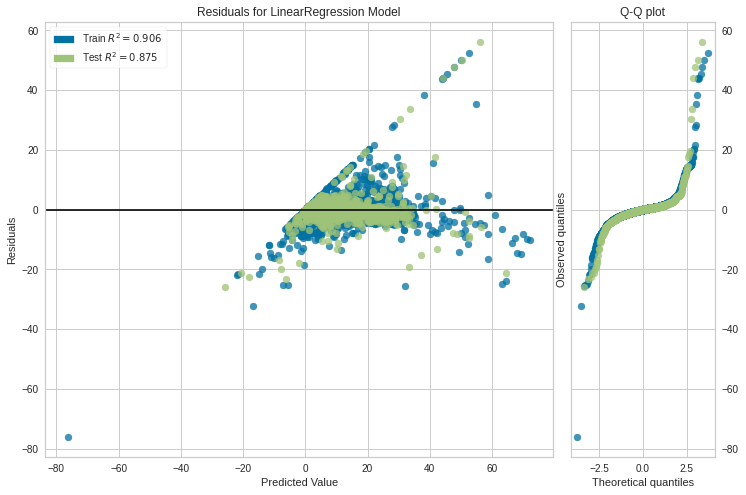

In [34]:
from yellowbrick.regressor import residuals_plot
plt.figure(figsize=(12,8));
viz = residuals_plot(linear, X_train_std, y_train_std, X_test_std, y_test_std, is_fitted=True, qqplot=True, hist=False);

### Ridge Residuals Plot

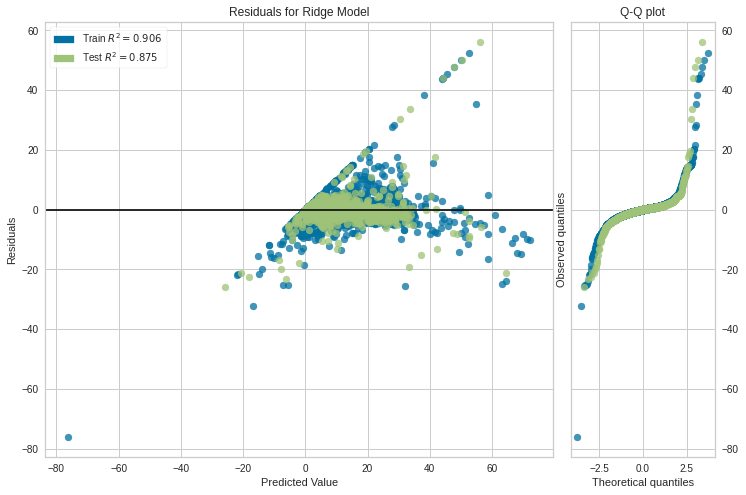

In [35]:
from yellowbrick.regressor import residuals_plot
plt.figure(figsize=(12,8));
viz = residuals_plot(rid, X_train_std, y_train_std, X_test_std, y_test_std, is_fitted=True, qqplot=True, hist=False);

### Lasso Residuals Plot

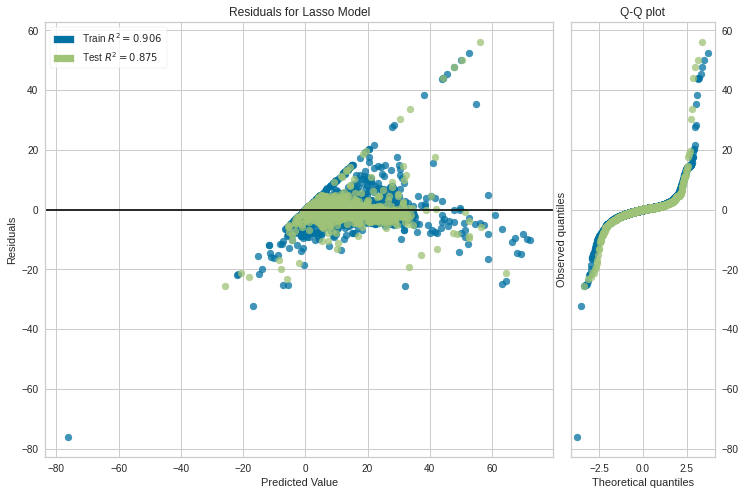

In [36]:
from yellowbrick.regressor import residuals_plot
plt.figure(figsize=(12,8));
viz = residuals_plot(lasso, X_train_std, y_train_std, X_test_std, y_test_std, is_fitted=True, qqplot=True, hist=False);

## No Lineales

### SVM

In [ ]:
niter = 15
cv = 10

In [ ]:
param = {'C':10**np.linspace(-3,3,101), 'gamma':['scale','auto'], 'epsilon':np.linspace(0,0.01,11)}

rbsvr =  SVR(kernel='rbf', max_iter=25000, cache_size=2000)
rbsvr_gs = BayesSearchCV(rbsvr,param,n_iter=niter, 
                        cv=cv, 
                        scoring='r2',
                        n_jobs=-1, 
                        refit=True, random_state=0)
rbsvr_gs.fit(X_train_std, y_train_std);

In [ ]:
show_html(pd.DataFrame(rbsvr_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
11,"{'C': 109.64781961431851, 'epsilon': 0.003, 'gamma': 'scale'}",0.858146,1
5,"{'C': 109.64781961431851, 'epsilon': 0.01, 'gamma': 'scale'}",0.858140,2
14,"{'C': 18.197008586099827, 'epsilon': 0.008, 'gamma': 'scale'}",0.791286,3
13,"{'C': 9.120108393559097, 'epsilon': 0.008, 'gamma': 'scale'}",0.768160,4
10,"{'C': 7.943282347242813, 'epsilon': 0.008, 'gamma': 'scale'}",0.763400,5


In [ ]:
print(np.mean(cross_val_score(rbsvr_gs.best_estimator_,X_train_std,y_train_std,cv=10)))

0.8581455114884659


In [ ]:
r = permutation_importance(rbsvr_gs, X_test_std, y_test_std,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

Energy_kcal2.293 +/- 0.058
Fat_g   1.500 +/- 0.040
Saturated_fats_g0.981 +/- 0.024
Magnesium_mg0.234 +/- 0.009
Phosphorus_mg0.020 +/- 0.005
Sugar_g 0.016 +/- 0.005
Riboflavin_mg0.016 +/- 0.002
VitB6_mg0.013 +/- 0.003
Potassium_mg0.013 +/- 0.006
VitB12_mcg0.012 +/- 0.003
Manganese_mg0.011 +/- 0.001
Protein_g0.005 +/- 0.000
Iron_mg 0.004 +/- 0.001
Sodium_mg0.002 +/- 0.000
Fiber_g 0.002 +/- 0.000
Carb_g  0.001 +/- 0.000
Calcium_mg0.000 +/- 0.000


In [ ]:
rbsvr_gs.score(X_test_std, y_test_std)

0.8303603750993807

### Random forest


In [ ]:
param = {'n_estimators': [5,10,25,40, 50, 75,100, 200], 
         'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], 
         'max_depth':[None, 1, 2, 3,  5,  8, 9,10,15], 
         'min_samples_leaf':[1,2,3,5,10]}

rf =  RandomForestRegressor(random_state=0)
rf_bs =  BayesSearchCV(rf,param,n_iter=niter, cv=cv, scoring='r2', n_jobs=-1, refit=True, random_state=0)
rf_bs.fit(X_train_std, y_train_std);

In [ ]:
show_html(pd.DataFrame(rf_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
13,"{'criterion': 'squared_error', 'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 100}",0.919453,1
11,"{'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 40}",0.909151,2
5,"{'criterion': 'squared_error', 'max_depth': 15, 'min_samples_leaf': 5, 'n_estimators': 40}",0.901057,3
6,"{'criterion': 'squared_error', 'max_depth': 9, 'min_samples_leaf': 3, 'n_estimators': 10}",0.893245,4
3,"{'criterion': 'absolute_error', 'max_depth': 9, 'min_samples_leaf': 3, 'n_estimators': 40}",0.891577,5


In [ ]:
print(np.mean(cross_val_score(rf_bs.best_estimator_,X_train_std,y_train_std,cv=10)))

0.9194532832660831


In [ ]:
r = permutation_importance(rf_bs, X_test_std, y_test_std,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

Fat_g   0.549 +/- 0.021
Magnesium_mg0.323 +/- 0.022
Energy_kcal0.072 +/- 0.005
Manganese_mg0.050 +/- 0.011
Sodium_mg0.046 +/- 0.003
Calcium_mg0.043 +/- 0.005
Phosphorus_mg0.024 +/- 0.004
Riboflavin_mg0.018 +/- 0.002
Saturated_fats_g0.016 +/- 0.002
Iron_mg 0.013 +/- 0.002
Zinc_mg 0.012 +/- 0.002
VitB6_mg0.007 +/- 0.001
Protein_g0.006 +/- 0.002
Thiamin_mg0.006 +/- 0.001
Fiber_g 0.003 +/- 0.000
Potassium_mg0.003 +/- 0.001
Carb_g  0.002 +/- 0.001
Folate_mcg0.002 +/- 0.001
Niacin_mg0.001 +/- 0.000
Copper_mcg0.001 +/- 0.000
VitC_mg 0.001 +/- 0.000
Selenium_mcg0.001 +/- 0.000
VitB12_mcg0.001 +/- 0.000


In [ ]:
rf_bs.score(X_test_std, y_test_std)

0.8911187728047942

### Gradient boosting


In [ ]:
param = {'n_estimators': [5,10,25,40, 50, 75,100, 200], 
         'loss':['squared_error', 'absolute_error', 'huber', 'quantile'], 
         'criterion':['friedman_mse', 'squared_error'], 
         'max_depth':[None, 1, 2, 3,  5,  8, 9,10,15],
         'min_samples_leaf':[1,2,3,5,10], 
         'learning_rate':[0.1,0.5, 1,3, 5, 10, 15]}

gb =  GradientBoostingRegressor(random_state=0,n_iter_no_change=5)
gb_bs =  BayesSearchCV(gb,param,n_iter=niter, cv=cv, n_jobs=-1, refit=True, random_state=0)
gb_bs.fit(X_train_std, y_train_std);

In [ ]:
show_html(pd.DataFrame(gb_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
10,"{'criterion': 'squared_error', 'learning_rate': 0.5, 'loss': 'huber', 'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 40}",0.899930,1
13,"{'criterion': 'friedman_mse', 'learning_rate': 0.5, 'loss': 'huber', 'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 40}",0.841680,2
14,"{'criterion': 'friedman_mse', 'learning_rate': 0.5, 'loss': 'huber', 'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 40}",0.841680,2
11,"{'criterion': 'friedman_mse', 'learning_rate': 0.5, 'loss': 'huber', 'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 25}",0.821871,4
12,"{'criterion': 'friedman_mse', 'learning_rate': 0.5, 'loss': 'huber', 'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 25}",0.821871,4


In [ ]:
print(np.mean(cross_val_score(gb_bs.best_estimator_,X_train_std,y_train_std,cv=10)))

0.899929952364235


In [ ]:
r = permutation_importance(gb_bs, X_test_std, y_test_std,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

Fat_g   0.613 +/- 0.028
Magnesium_mg0.291 +/- 0.030
Energy_kcal0.252 +/- 0.011
Saturated_fats_g0.145 +/- 0.012
Manganese_mg0.105 +/- 0.029
Sodium_mg0.084 +/- 0.005
Calcium_mg0.064 +/- 0.009
Iron_mg 0.028 +/- 0.003
Folate_mcg0.024 +/- 0.004
Riboflavin_mg0.019 +/- 0.002
Zinc_mg 0.017 +/- 0.003
Phosphorus_mg0.015 +/- 0.001
Thiamin_mg0.012 +/- 0.002
VitB6_mg0.012 +/- 0.004
Protein_g0.009 +/- 0.002
Carb_g  0.007 +/- 0.001
Potassium_mg0.006 +/- 0.002
Fiber_g 0.005 +/- 0.001
Copper_mcg0.004 +/- 0.001
VitC_mg 0.003 +/- 0.001
Selenium_mcg0.001 +/- 0.000


In [ ]:
gb_bs.score(X_test_std, y_test_std)

0.8639211706987882

# EXTRA

In [ ]:
#X = df.loc[:, df.columns!= 'Iron_mg']
#y = df['Iron_mg']
#X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X, y, test_size = 0.25, random_state = 7)
#linear = LinearRegression()
#linear.fit(X_train_std, y_train_std)
#y_pred = linear.predict(X_train_std)
#N = X_train_std.shape[0]
#prediction = linear.predict(X_train_std)
#mean_square_error_sk = mean_squared_error(y_train_std, prediction)
#mean_square_error_sk
#norm_mse = np.sum((y_train_std - prediction)**2)/((N)*np.var(y_train_std))
#norm_mse_sk = 1-r2_score(y_train_std,prediction)
#norm_mse, norm_mse_sk
#R_squared_sk = r2_score(y_train_std,prediction) 
#R_squared_sk